# Importing Moduls

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

### Importing the dataset from CSV file. 

* first we need to import the csv file from the local document. 

In [2]:
dataset_frame = pd.read_csv('insurance.csv')
print(dataset_frame.shape)
print(dataset_frame.head(10))

(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


* We can create a function to distinguish the columns based on their type as categorical or quantitative. 

In [3]:
def check_variables(df):
    cols = df.columns
    quantitative_cols = df._get_numeric_data().columns
    categorical_cols = list(set(cols) - set(quantitative_cols))
    return categorical_cols, list(set(quantitative_cols))

* Then we use the created function to find out which columns are categorical, and which are quantitative. 

In [4]:
cat_cols, quant_cols = check_variables(dataset_frame)
print(f'categorical columns: {cat_cols}')
print(f'quantitativecolumns: {quant_cols}') 

categorical columns: ['sex', 'smoker', 'region']
quantitativecolumns: ['children', 'bmi', 'charges', 'age']


* So, we have three categorical and four quantitative features. 
* We now considering categoricaal variables and then move on to the quantitative variables. 

### Categorical variables

#### 1- sex

In [5]:
dataset_frame['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

* The frequency of the 'sex' feature is 1338, with 2 categories, which is 'male' and 676 number of cases. 

In [6]:
dataset_frame['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

* Also we see there are 662 female cases. So the numbers are so close to each other. 

<AxesSubplot:ylabel='sex'>

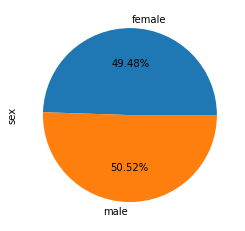

In [7]:
dataset_frame.groupby('sex').size().plot(kind='pie', ylabel='sex', autopct='%.2f%%')

* As it is shown in the pie chart, almost 50% for each categoriy is provided. This is also visible in the next bar chart.

[Text(0, 0, '662'), Text(0, 0, '676')]

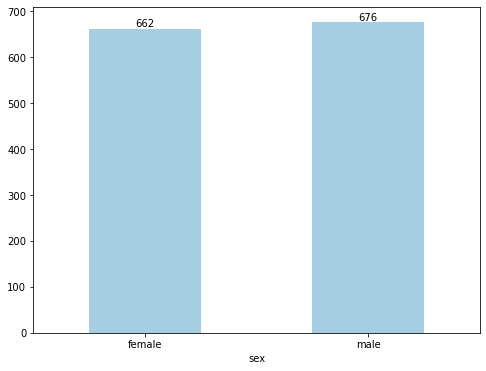

In [10]:
plt.figure(figsize=(8,6))
ax = dataset_frame.groupby('sex').size().plot(kind='bar', rot=0, colormap='Paired')
ax.bar_label(ax.containers[0])

#### 2- Smoker

In [12]:
dataset_frame['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [13]:
dataset_frame.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

* The second categorical feature, 'smoker', is nothing like 'sex'. The vase majority of the sample data are not smoker. 
* As it is shown in the pie chart, and bar chart after that, in each 5 person, almost one of them is smoker. 

<AxesSubplot:ylabel='smoker'>

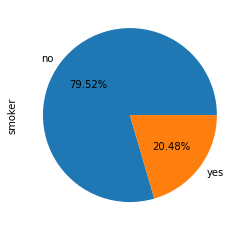

In [14]:
dataset_frame.groupby('smoker').size().plot(kind='pie', ylabel='smoker', autopct='%.2f%%')

[Text(0, 0, '1064'), Text(0, 0, '274')]

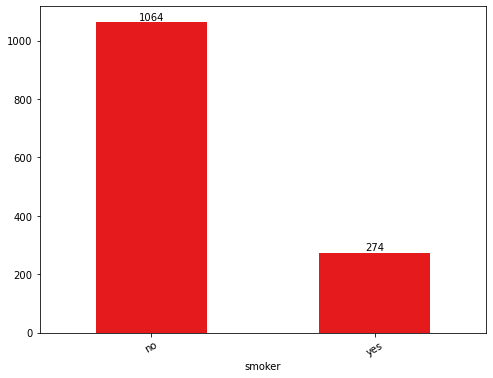

In [16]:
plt.figure(figsize=(8,6))
ax = dataset_frame.groupby('smoker').size().plot(kind='bar', rot=30, colormap='Set1')
ax.bar_label(ax.containers[0])

#### 3- Region

In [17]:
dataset_frame['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [18]:
dataset_frame.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

* Third feature is 'region'. with 4 different categories as areas of a city or country. 
* We may see that three cateegories are almost same in frequency, however, the last one has a considerable differnce from the others. 

<AxesSubplot:ylabel='region'>

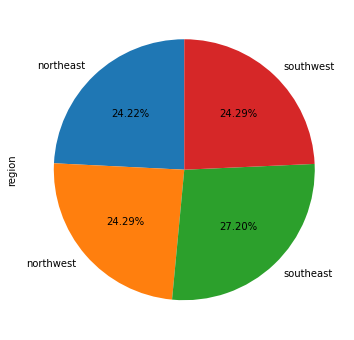

In [21]:
plt.figure(figsize=(8,6))
dataset_frame.groupby('region').size().plot(kind='pie', startangle=90, ylabel='region', autopct='%.2f%%')

[Text(0, 0, '324'), Text(0, 0, '325'), Text(0, 0, '364'), Text(0, 0, '325')]

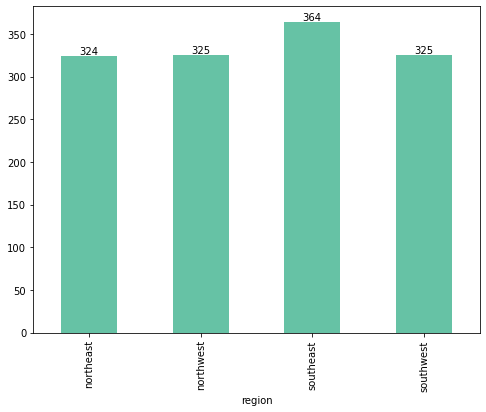

In [20]:
plt.figure(figsize=(8,6))
ax = dataset_frame.groupby('region').size().plot(kind='bar', rot=90, colormap='Set2')
ax.bar_label(ax.containers[0])

* As it is shown, 'southeast' area has 39-40 more cases comparing to the other areas. 

### Quantitative variables Examining Distributions

* Now we are going to describe the quantitative variables of the dataset.

#### 1- Children

In [22]:
dataset_frame.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

[Text(0, 0, '574'),
 Text(0, 0, '324'),
 Text(0, 0, '240'),
 Text(0, 0, '157'),
 Text(0, 0, '25'),
 Text(0, 0, '18')]

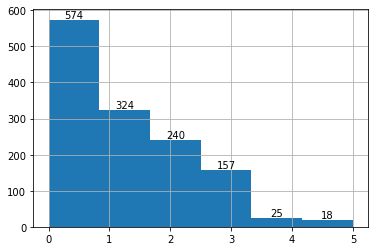

In [80]:
ax = dataset_frame['children'].hist(bins=6)
ax.bar_label(ax.containers[0])

In [40]:
min_ = dataset_frame.children.min()
max_ = dataset_frame.children.max()
print('mode:', dataset_frame.children.mode())
print('mean:', dataset_frame.children.mean())
print('median:', dataset_frame.children.median())
range_ = max_ - min_
print('min:', min_)
print('max:', max_)
print('range:', range_)

mode: 0    0
dtype: int64
mean: 1.0949177877429
median: 1.0
min: 0
max: 5
range: 5


* So, as for shape of the histogram, 'children' variable is right-skewed. It is not symmetric. Also it only has one modde. 
* Center value is 1. The most value existed is 5, to the farthest right. 
* As for the spread of the feature, min is 0 and max is 5, so the range is 5. 
* There is no outlier for this feature. 

In [42]:
Q25 = dataset_frame.children.quantile(0.25)
Q75 = dataset_frame.children.quantile(0.75)
IQR = Q75 - Q25
print('Q1:', Q25)
print('Q3:', Q75)
print('IQR:', IQR)

Q1: 0.0
Q3: 2.0
IQR: 2.0


* Almost 75% of cases have maximum of 2 children. 

In [47]:
children_outliers = dataset_frame[(dataset_frame.children < Q25 - 1.5 * IQR) | (dataset_frame.children > Q75 + 1.5 * IQR)]['children']
children_outliers

Series([], Name: children, dtype: int64)

In [49]:
children_std = dataset_frame.children.std()
children_std


1.2054927397819095

Text(0, 0.5, 'Children')

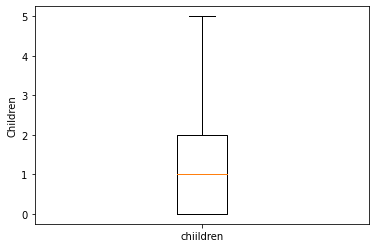

In [51]:
plt.boxplot(x=dataset_frame.children, labels=['chiildren'])
plt.ylabel('Children')

#### 2- Charges

In [52]:
dataset_frame.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:>

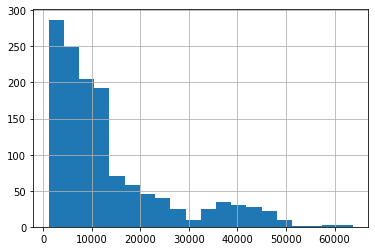

In [59]:
dataset_frame['charges'].hist(bins=20)

* As the histogram shows, 'charges' feaature is not a symmetric, but a right-skewed variable. 
* It somehow can be considered a bimodal variable. 
* Also we can find the range and extremes of this column at the next cell  output.

In [57]:
min_ = dataset_frame.charges.min()
max_ = dataset_frame.charges.max()
print('mode:', dataset_frame.charges.mode())
print('mean:', dataset_frame.charges.mean())
print('median:', dataset_frame.charges.median())
range_ = max_ - min_
print('min:', min_)
print('max:', max_)
print('range:', range_)

mode: 0    1639.5631
dtype: float64
mean: 13270.422265141257
median: 9382.033
min: 1121.8739
max: 63770.42801
range: 62648.554110000005


* Since this is not a symmetric feature, it is good to show the center of it by median, which is 9382, rather than mean with value of 13270. 

In [61]:
Q25 = dataset_frame.charges.quantile(0.25)
Q75 = dataset_frame.charges.quantile(0.75)
IQR = Q75 - Q25
print('Q1:', Q25)
print('Q3:', Q75)
print('IQR:', IQR) 

Q1: 4740.28715
Q3: 16639.912515
IQR: 11899.625365


* The IQR can now be used as for calculating the outliers. 

In [62]:
charges_outliers = dataset_frame[(dataset_frame.charges < Q25 - 1.5 * IQR) | (dataset_frame.charges > Q75 + 1.5 * IQR)]['charges']
charges_outliers

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64

The number of outliers is outstanding. Can be considerable!

In [63]:
charges_std = dataset_frame.charges.std()
charges_std

12110.011236693994

* The mean is 13270, and standard deviation is 12110. So mean (+/-) 3sigma gives -23060 and 49600. 
* So any thing out of this bound can be considered as an outlier, instead of the previous method. 
* However, as this variable is not symmetric, we can not be hundred percent sure to use the second way of finding outliers. 
* We would be better to investigate more about the reason of outliers existence. Maybe we should not remove them at at all!

Text(0, 0.5, 'charges')

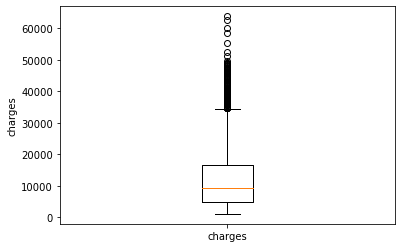

In [64]:
plt.boxplot(x=dataset_frame.charges, labels=['charges'])
plt.ylabel('charges')

#### 3- Age

<AxesSubplot:>

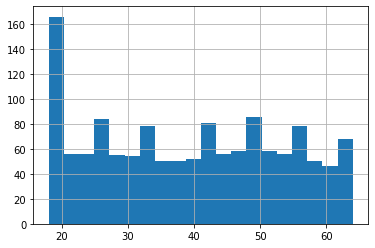

In [65]:
dataset_frame['age'].hist(bins=20)

* This histogram shows that this variable 'age' is definitely not any skewed but a symmetric one.
* It is a multi modal one, having 7 modes. Or we can reconsider it as a bimodal variable, as for the first bar and the one at value of 50. 
* Extremes and range are presentd in the next cell. 

In [66]:
min_ = dataset_frame.age.min()
max_ = dataset_frame.age.max()
print('mode:', dataset_frame.age.mode())
print('mean:', dataset_frame.age.mean())
print('median:', dataset_frame.age.median())
range_ = max_ - min_
print('min:', min_)
print('max:', max_)
print('range:', range_)

mode: 0    18
dtype: int64
mean: 39.20702541106129
median: 39.0
min: 18
max: 64
range: 46


In [67]:
Q25 = dataset_frame.age.quantile(0.25)
Q75 = dataset_frame.age.quantile(0.75)
IQR = Q75 - Q25
print('Q1:', Q25)
print('Q3:', Q75)
print('IQR:', IQR)

Q1: 27.0
Q3: 51.0
IQR: 24.0


In [68]:
age_outliers = dataset_frame[(dataset_frame.age < Q25 - 1.5 * IQR) | (dataset_frame.age > Q75 + 1.5 * IQR)]['age']
age_outliers

Series([], Name: age, dtype: int64)

* This shows that there is no ooutlier in 'age' feature. 

In [69]:
age_std = dataset_frame.age.std()
age_std

14.049960379216172

* With this standard deviation, even 3 sigma represents no outliers for this dcolumn. 

Text(0, 0.5, 'age')

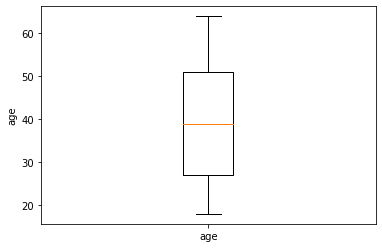

In [70]:
plt.boxplot(x=dataset_frame.age, labels=['age'])
plt.ylabel('age')

* As it suggests, the 'age' is fairly normal. 

#### 4- BMI

<AxesSubplot:>

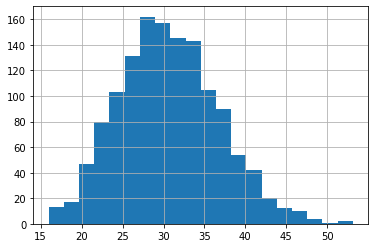

In [71]:
dataset_frame['bmi'].hist(bins=20)

* 'bmi' is a normal variable, and it shows a symmetric normal distribution. 
* There is no skewness in the data. 

In [72]:
min_ = dataset_frame.bmi.min()
max_ = dataset_frame.bmi.max()
print('mode:', dataset_frame.bmi.mode())
print('mean:', dataset_frame.bmi.mean())
print('median:', dataset_frame.bmi.median())
range_ = max_ - min_
print('min:', min_)
print('max:', max_)
print('range:', range_)

mode: 0    32.3
dtype: float64
mean: 30.663396860986538
median: 30.4
min: 15.96
max: 53.13
range: 37.17


* As for spread criteria, the range is 37 for this feature. 

In [73]:
Q25 = dataset_frame.bmi.quantile(0.25)
Q75 = dataset_frame.bmi.quantile(0.75)
IQR = Q75 - Q25
print('Q1:', Q25)
print('Q3:', Q75)
print('IQR:', IQR)

Q1: 26.29625
Q3: 34.69375
IQR: 8.3975


In [81]:
bmi_outliers = dataset_frame[(dataset_frame.bmi < Q25 - 1.5 * IQR) | (dataset_frame.bmi > Q75 + 1.5 * IQR)]['bmi']
bmi_outliers

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

* This should not be the list of outliers, because it is symmetric, and mean can be considered as the center point of the distribution. 

In [75]:
bmi_std = dataset_frame.bmi.std()
bmi_std

6.098186911679017

* Maybe considering the 3 sigma for determining the outlier is a better option. This way, the number of outliers reduces from 9 to 5. 

Text(0, 0.5, 'bmi')

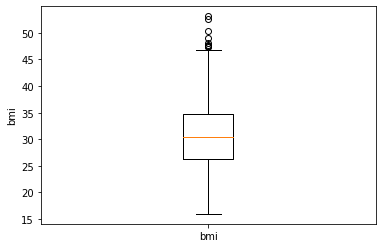

In [76]:
plt.boxplot(x=dataset_frame.bmi, labels=['bmi'])
plt.ylabel('bmi')

The box plot clearly demonstrate 5 numbers (min, Q1, M, Q3, max), and how symmetric the variable is. 